In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import matplotlib.image as mpimg
import pylab as pl
%matplotlib inline

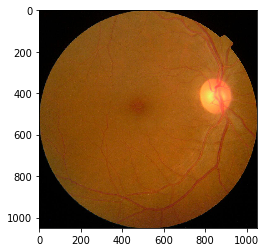

In [2]:
image = cv2.imread('train_images/0a4e1a29ffff.png')   # 000c1434d8d7 0a4e1a29ffff 7b87b0015282

#imgplot = plt.imshow(image)
imgplot = plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

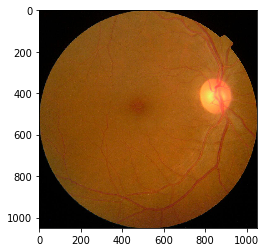

In [3]:
import matplotlib.image as mpimg
img=mpimg.imread('train_images/0a4e1a29ffff.png') #0083ee8054ee  0a4e1a29ffff
imgplot = plt.imshow(img)
plt.show()

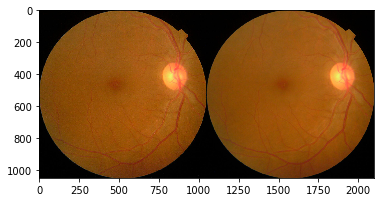

In [4]:
image = cv2.imread('train_images/0a4e1a29ffff.png')   # 000c1434d8d7 0a4e1a29ffff 7b87b0015282  0083ee8054ee
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
median = cv2.medianBlur(image, 5)
compare = np.concatenate((image, median), axis=1) #side by side comparison
#cv2.imshow('img', compare)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
plt.imshow(compare)
plt.show()

In [5]:
#CLAHE
def clahe_rgb(image, cliplimit=None, tilesize=8):
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    lab_planes = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=cliplimit,tileGridSize=(tilesize, tilesize))
    lab_planes[0] = clahe.apply(lab_planes[0])
    lab = cv2.merge(lab_planes)
    rgb = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
    return rgb
    #plt.imshow(rgb)
    #plt.show()

clahe_rgb(median, 2, 8)
#clahe_rgb(image, 3, 8)
clahe_rgb(median, 4, 8)
clahe_rgb(median, 8, 8)

array([[[22, 22, 20],
        [22, 22, 20],
        [22, 22, 20],
        ...,
        [22, 22, 20],
        [22, 22, 20],
        [22, 22, 20]],

       [[22, 22, 20],
        [22, 22, 20],
        [22, 22, 20],
        ...,
        [22, 22, 20],
        [22, 22, 20],
        [22, 22, 20]],

       [[22, 22, 20],
        [22, 22, 20],
        [22, 22, 20],
        ...,
        [22, 22, 20],
        [22, 22, 20],
        [22, 22, 20]],

       ...,

       [[13, 13, 13],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [13, 13, 13]],

       [[13, 13, 13],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [13, 13, 13]],

       [[13, 13, 13],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [22, 22, 22]]], dtype=uint8)

In [6]:
cv2.clahe_rgb(median, 8, 8)

AttributeError: module 'cv2' has no attribute 'clahe_rgb'

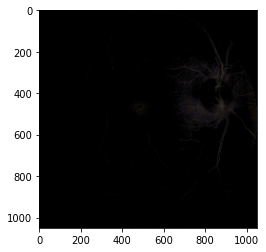

In [7]:
#Then perform subtraction of Median filtered image and CLACHE IMAGE to get normalized image

#Icl = cv2.cvtColor(clahe_rgb(median, 8, 8),cv2.COLOR_RGB2GRAY)
#Ibk = cv2.cvtColor(median,cv2.COLOR_RGB2GRAY)
#Inr = cv2.subtract(Ibk - Icl)
Inr = cv2.subtract(median, clahe_rgb(median, 2, 8))
plt.imshow(Inr)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


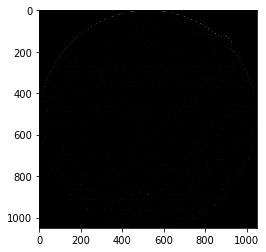

In [8]:
#tophat morphological operation
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, (8,8))
plt.imshow(tophat)
plt.show()

In [9]:
#binarization
#medianbk = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
ret,thresh1 = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)
#plt.imshow(thresh1)
#plt.show()

cv2.imshow("Image", thresh1)
cv2.waitKey(0)
cv2.destroyAllWindows()

#thresh1


In [10]:
thresh1.shape

(1050, 1050, 3)

In [11]:


# find all the 'black' shapes in the image
lower = np.array([255, 0, 0])
upper = np.array([15, 15, 15])
shapeMask = cv2.inRange(thresh1, lower, upper)
shapeMask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [33]:
import imutils
# find the contours in the mask
cnts = cv2.findContours(shapeMask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#ctr = np.array(cnts).reshape((-1,1,3)).astype(np.int64)
#cnts = imutils.contours(cnts)
print("I found {} black shapes".format(len(cnts)))
cv2.imshow("Mask", shapeMask)
 
# loop over the contours
for c in cnts:
    # draw the contour and show it
    cv2.drawContours(image, [c.astype(int)], -1, (0, 255, 0), 2)
    cv2.imshow("Image", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

I found 3 black shapes


error: OpenCV(3.4.1) C:\Miniconda3\conda-bld\opencv-suite_1533128839831\work\modules\imgproc\src\drawing.cpp:2515: error: (-215) npoints > 0 in function cv::drawContours


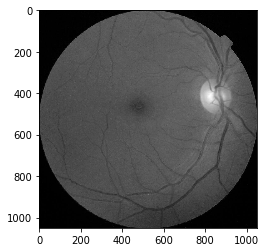

In [9]:
#method 2

img = image = cv2.imread('train_images/0a4e1a29ffff.png')
b, g, r = cv2.split(img)
plt.imshow(g, cmap='gray')
plt.show()

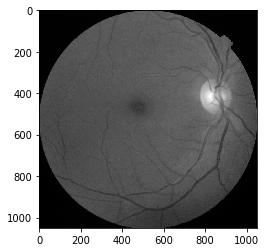

In [60]:
opening = cv2.morphologyEx(g, cv2.MORPH_OPEN, (40,40))
plt.imshow(opening, cmap='gray')
plt.show()

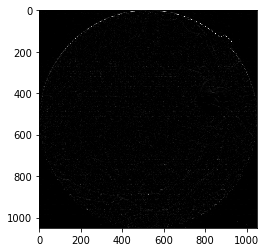

In [61]:
illuminationCorrection = cv2.subtract(g, opening)
plt.imshow(illuminationCorrection, cmap='gray')
plt.show()

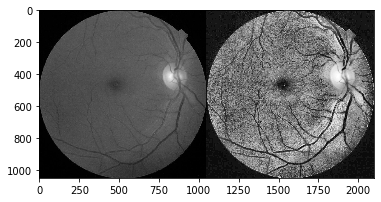

In [251]:
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(8,8))
clahe = clahe.apply(g)
res = np.hstack((g,clahe)) #stacking images side-by-side
plt.imshow(res, cmap='gray')
plt.show()

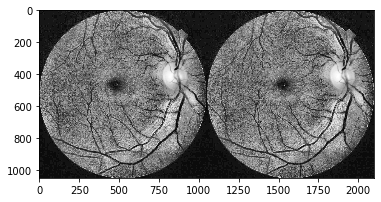

In [256]:
median = cv2.medianBlur(clahe, 1)
compare = np.concatenate((clahe, median), axis=1) #side by side comparison
plt.imshow(compare, cmap='gray')
plt.show()

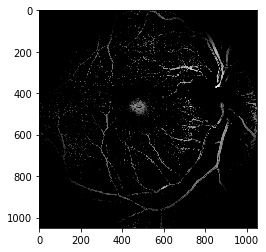

In [257]:
bvAndHamerage = cv2.subtract(g,median)
plt.imshow(bvAndHamerage, cmap='gray')
plt.show()
cv2.imshow('input', bvAndHamerage)
cv2.waitKey()
cv2.destroyAllWindows()

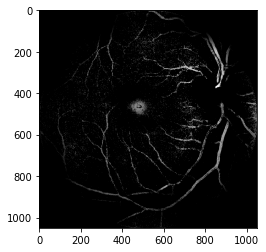

In [258]:
blur = cv2.blur(bvAndHamerage,(5,5))
plt.imshow(blur, cmap='gray')
plt.show()
cv2.imshow('input', blur)
cv2.waitKey()
cv2.destroyAllWindows()

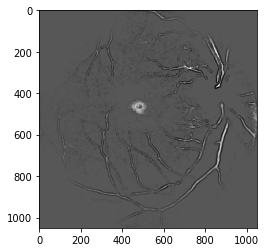

In [263]:
from skimage.filters import (threshold_otsu, threshold_niblack,
                             threshold_sauvola)

window_size = 9
thresh_niblack = threshold_niblack(blur, window_size=window_size, k=2)
plt.imshow(thresh_niblack, cmap='gray')
plt.show()
cv2.imshow('input', thresh_niblack)
cv2.waitKey()
cv2.destroyAllWindows()

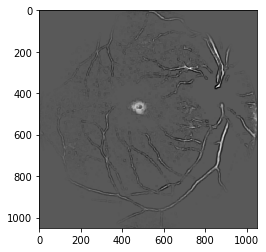

In [264]:
opening = cv2.morphologyEx(thresh_niblack, cv2.MORPH_OPEN, (10,10))
plt.imshow(opening, cmap='gray')
plt.show()
cv2.imshow('input', opening)
cv2.waitKey()
cv2.destroyAllWindows()

In [217]:
#Doesn't give proper output so skip for now
import cv2
import numpy as np
from matplotlib import pyplot as plt
import sys


def on_mouse(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        print('Start Mouse Position: ' + str(x) + ', ' + str(y))
        s_box = x, y
        boxes.append(s_box)


def region_growing(img, seed):
    #Parameters for region growing
    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    region_threshold = 0.2
    region_size = 1
    intensity_difference = 0
    neighbor_points_list = []
    neighbor_intensity_list = []

    #Mean of the segmented region
    region_mean = img[seed]

    #Input image parameters
    height, width = img.shape
    image_size = height * width

    #Initialize segmented output image
    segmented_img = np.zeros((height, width, 1), np.uint8)

    #Region growing until intensity difference becomes greater than certain threshold
    while (intensity_difference < region_threshold) & (region_size < image_size):
        #Loop through neighbor pixels
        for i in range(4):
            #Compute the neighbor pixel position
            x_new = seed[0] + neighbors[i][0]
            y_new = seed[1] + neighbors[i][1]

            #Boundary Condition - check if the coordinates are inside the image
            check_inside = (x_new >= 0) & (y_new >= 0) & (x_new < height) & (y_new < width)

            #Add neighbor if inside and not already in segmented_img
            if check_inside:
                if segmented_img[x_new, y_new] == 0:
                    neighbor_points_list.append([x_new, y_new])
                    neighbor_intensity_list.append(img[x_new, y_new])
                    segmented_img[x_new, y_new] = 255

        #Add pixel with intensity nearest to the mean to the region
        distance = abs(neighbor_intensity_list-region_mean)
        pixel_distance = min(distance)
        index = np.where(distance == pixel_distance)[0][0]
        segmented_img[seed[0], seed[1]] = 255
        region_size += 1

        #New region mean
        region_mean = (region_mean*region_size + neighbor_intensity_list[index])/(region_size+1)

        #Update the seed value
        seed = neighbor_points_list[index]
        #Remove the value from the neighborhood lists
        neighbor_intensity_list[index] = neighbor_intensity_list[-1]
        neighbor_points_list[index] = neighbor_points_list[-1]

    return segmented_img


if __name__ == '__main__':

    boxes = []
    #filename = 'image.jpg'
    #img = cv2.imread(filename, 0)
    resized = cv2.resize(opening,(256,256))
    cv2.namedWindow('input')
    cv2.setMouseCallback('input', on_mouse, 0,)
    cv2.imshow('input', resized)
    cv2.waitKey()
    print("Starting region growing based on last click")
    seed = boxes[-1]
    cv2.imshow('input', region_growing(resized, seed))
    print("Done. Showing output now")

    cv2.waitKey()
    cv2.destroyAllWindows()


Start Mouse Position: 213, 75
Starting region growing based on last click
Done. Showing output now


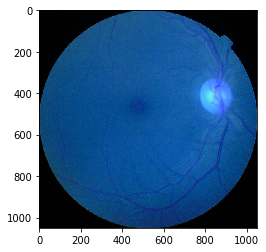

In [265]:
#Region Growing try 2
'''ser = cv2.MSER_create()
regions = mser.detectRegions(opening)
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
cv2.polylines(vis, hulls, 1, (0, 255, 0))
cv2.imshow('img', vis)
cv2.waitKey(0)
cv2.destroyAllWindows()'''

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
vis = image.copy()

regions, _ = mser.detectRegions(gray)
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
cv2.polylines(vis, hulls, 1, (0, 255, 0))
plt.imshow(vis, cmap='gray')
plt.show()

cv2.imshow('img', vis)
cv2.waitKey(0)
cv2.destroyAllWindows()

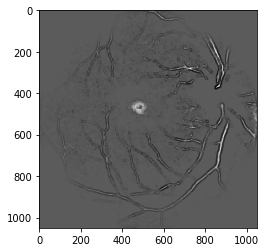

In [266]:
kernel = np.ones((2,2),np.uint8)
erosion = cv2.erode(opening,kernel,iterations = 1)
plt.imshow(erosion, cmap='gray')
plt.show()
cv2.imshow('input', erosion)
cv2.waitKey()
cv2.destroyAllWindows()

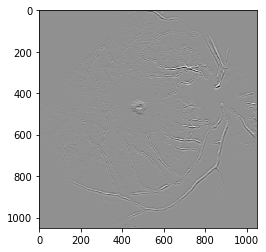

In [267]:
hemorrhage =  cv2.subtract(thresh_niblack, opening)
plt.imshow(hemorrhage, cmap='gray')
plt.show()
cv2.imshow('input', hemorrhage)
cv2.waitKey()
cv2.destroyAllWindows()